#### Step-1: Importing Libraries

In [106]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, deltaE_cie76

#### Step-2: Reading image

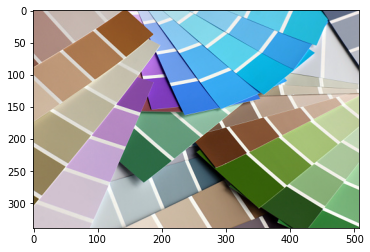

In [107]:
image = cv2.imread('sample_image.jpg')
plt.imshow(image)
plt.show()

#### Step-3: Checking Type and Shape of image Data

In [108]:
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))

The type of this input is <class 'numpy.ndarray'>
Shape: (339, 508, 3)


#### Step-4: Converting BGR-To-RGB

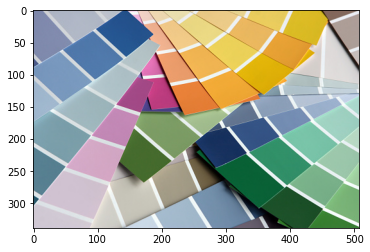

In [109]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

#### Step-5: Converting Image to GrayScale

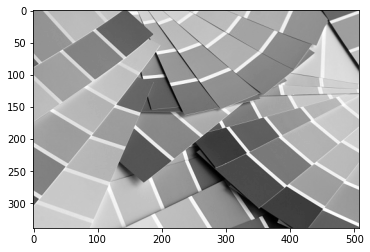

In [110]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()

#### Step-6: Resizing Images

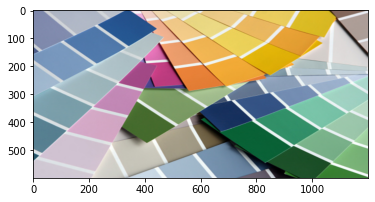

In [111]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)
plt.show()

#### Step-7:Let us start color Identification

In [112]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

#### Step-8: Defining method for getting images & Conversion from BGR-TO-RGB

In [113]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

#### Step-9: Defining method along with K_Means Algorithm

In [114]:
def get_colors(image, number_of_colors, show_chart): 
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

#### Step-10: Calling Above Two Functions inside each other

[array([227.00690219, 163.51469912,  39.90163096]),
 array([177.90427641, 185.28638958, 192.3283325 ]),
 array([ 66.72854489, 111.77843223, 136.14543226]),
 array([36.28938053, 77.79498525, 51.36980088]),
 array([129.49812182, 159.33191292, 154.67093465]),
 array([171.52641509,  76.60738994, 125.30440252]),
 array([220.24993944, 219.35431907, 221.02967395]),
 array([236.07105678, 192.79561626, 108.89675756])]

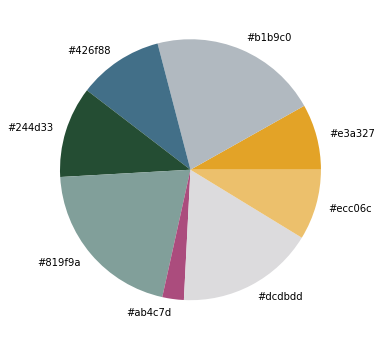

In [115]:
get_colors(get_image('sample_image.jpg'), 8, True)

#### Step-11: Search images using Color

In [116]:
IMAGE_DIRECTORY = 'images'

COLORS = {'GREEN': [0, 128, 0],'BLUE': [0, 0, 128],'YELLOW': [255, 255, 0]}

images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

#### Step-12: Visualization of Data

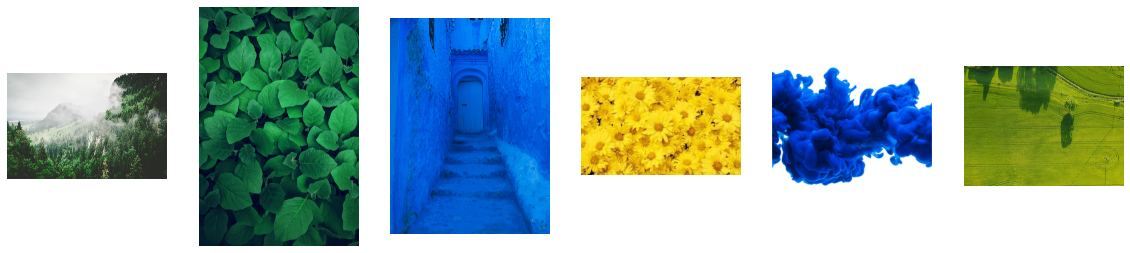

In [117]:
plt.figure(figsize=(20, 5))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])
    plt.axis('off')

#### Step-13: Function for finding matches by using top 10 colors in images

In [118]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    
    for i in range(number_of_colors):
        
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        
        if (diff < threshold):
            select_image = True
    
    return select_image

#### Step-14: Function for selection of images (Match/Mismatch)

In [119]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            plt.axis('off')
            index += 1

#### Step-15:Calling above methods and visualizing results

Finding GREEN COLOR

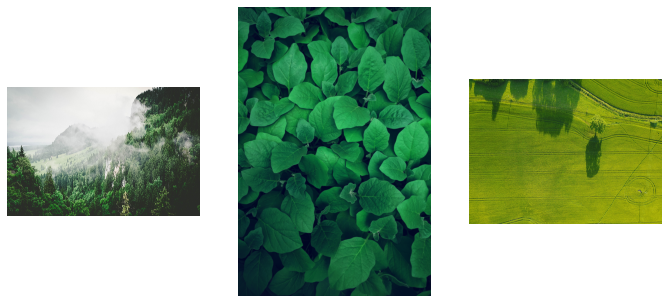

In [120]:
plt.figure(figsize = (20, 8))
show_selected_images(images, COLORS['GREEN'], 60, 5)

Finding Blue Color

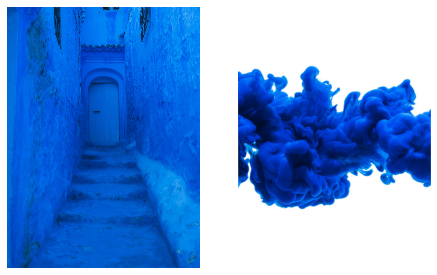

In [121]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

Finding Yellow Color

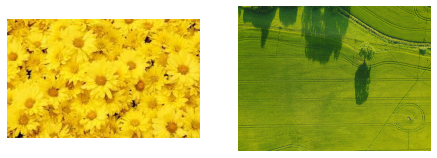

In [122]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

#### Conclusion

**Used Algorithm**: KMeans Clustering Algorithm to extract majority colors from images,used the RGB Values of Colors to identify images from a collection that have that color in them.